# Libraries

In [1]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np 
from sklearn.ensemble import HistGradientBoostingClassifier
from scipy.sparse import hstack

# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays wit

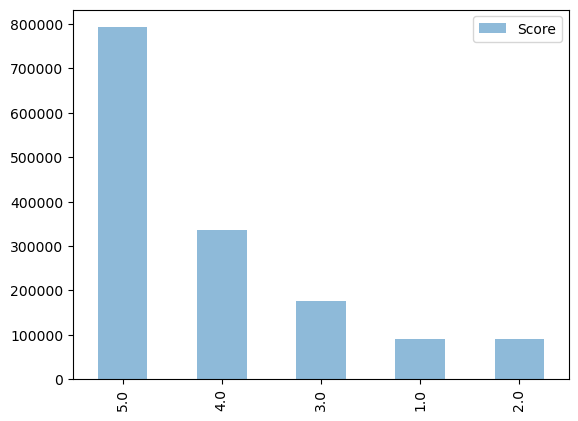


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [2]:
trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

In [3]:
train =  trainingSet[trainingSet['Score'].notnull()]
train = train[train['Text'].notnull() & train['Summary'].notnull()]  # Ensure Text and Summary is not null
test = trainingSet[trainingSet['Score'].isnull()]
test['Summary'].fillna('', inplace=True)  # Fill missing Summary values in test set with empty string
test['Text'].fillna('', inplace=True)
train.shape, test.shape, type(test), test['Id'].nunique(),testingSet['Id'].nunique()

/var/folders/v8/mv4rys5139g9vp7llrmrtr580000gn/T/ipykernel_6015/1944172866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Summary'].fillna('', inplace=True)  # Fill missing Summary values in test set with empty string
/var/folders/v8/mv4rys5139g9vp7llrmrtr580000gn/T/ipykernel_6015/1944172866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Text'].fillna('', inplace=True)


((1485259, 9), (212192, 9), pandas.core.frame.DataFrame, 212192, 212192)

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(
    train[['Text', 'Summary']],
    train['Score'],
    test_size=1/4.0,
    random_state=0
)
# X_train = X_train.to_frame()

# X_val = X_val.to_frame()

Y_train = Y_train.to_frame()

Y_val = Y_val.to_frame()

X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((1113944, 2), (371315, 2), (1113944, 1), (371315, 1))

In [9]:
print(Y_train.head())

         Score
734052     3.0
412217     5.0
1300573    3.0
307343     5.0
1367226    4.0


In [6]:
X_val.head()


,Text,Summary
163821,This is a wonderful love story it will pull y...,Great Movie!
1417186,"With: Emily Browning, Arielle Kebbel, David St...",Has a Good Twisted Ending
560371,&quot;The Master of Disguise&quot; is a terrib...,Just a Bad Movie!
964468,Leave it ti Spielberg to make a good story eve...,I loved it
1301298,Quit being a friggin troll! Anyone who review...,To the previous reviewer!


In [7]:
features = ['Id', 'Text', 'Summary']
id_text = test[features]
id_text.shape, id_text['Id'].nunique()

((212192, 3), 212192)

In [10]:
Y = pd.merge(id_text, testingSet, left_on='Id', right_on='Id') # Y 改成 X_submission
Y.head(), type(Y),Y['Id'].nunique(), Y.shape

(        Id                                               Text  \
 0  1323432  This movie was just alright for me. I think pe...   
 1  1137299  My kids love this movie.  Exciting and fun to ...   
 2  1459366  The effects were good, not the best but far fr...   
 3   931601  I just got a copy of this S. Korean dvd of "He...   
 4  1311995  OK, to put this clearly and bluntly... if you ...   
 
                                              Summary  Score  
 0                                  Okay for a rental    NaN  
 1                                     Great for kids    NaN  
 2                                         good movie    NaN  
 3  Excellent quality dvd.  Don't pay big bucks fo...    NaN  
 4                                     A mixed review    NaN  ,
 pandas.core.frame.DataFrame,
 212192,
 (212192, 4))

In [11]:
Y[['Text', 'Summary']].fillna('NONE NONE', inplace=True)
Y['Id'].nunique(), Y.shape

/var/folders/v8/mv4rys5139g9vp7llrmrtr580000gn/T/ipykernel_6015/2832831753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[['Text', 'Summary']].fillna('NONE NONE', inplace=True)


(212192, (212192, 4))

In [12]:
# Vectorize Text and Summary separately
text_vectorizer = TfidfVectorizer(max_features=15000)
summary_vectorizer = TfidfVectorizer(max_features=15000)

In [13]:
# Vectorize training and validation Text
x_vec_train_text = text_vectorizer.fit_transform(X_train['Text'].tolist())
x_vec_val_text = text_vectorizer.transform(X_val['Text'].tolist())

In [14]:
# Vectorize training and validation Summary
x_vec_train_summary = summary_vectorizer.fit_transform(X_train['Summary'].tolist())
x_vec_val_summary = summary_vectorizer.transform(X_val['Summary'].tolist())

In [15]:
# Combine the sparse matrices
x_vec_train_combined = hstack([x_vec_train_text, x_vec_train_summary])
x_vec_val_combined = hstack([x_vec_val_text, x_vec_val_summary])

In [16]:
MNB_classifier = MultinomialNB()
MNB_classifier.fit(x_vec_train_combined, Y_train['Score'])
MNB_pred = MNB_classifier.predict(x_vec_val_combined)
MNB_accuracy = accuracy_score(Y_val['Score'], MNB_pred)
print("MultinomialNB Accuracy: ", MNB_accuracy)

MultinomialNB Accuracy:  0.6314934758897432


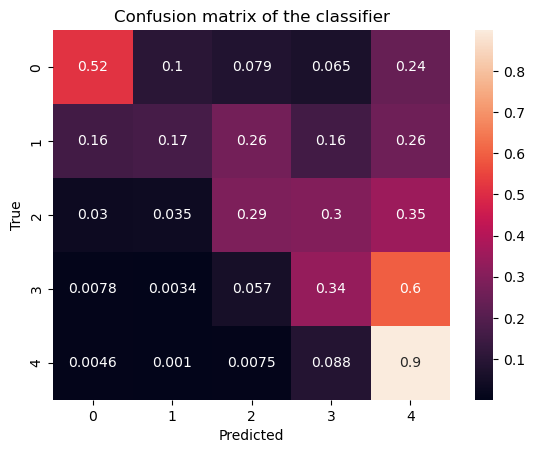

In [17]:
cm = confusion_matrix(Y_val['Score'], MNB_pred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
nb_model = MultinomialNB()
nb_model.fit(x_vec_train_combined, Y_train['Score'])
train_probs = nb_model.predict_proba(x_vec_train_combined)
test_probs = nb_model.predict_proba(x_vec_val_combined)

gbc = HistGradientBoostingClassifier(max_depth=10, learning_rate=0.1,scoring = 'accuracy', random_state=0,l2_regularization=1)
gbc.fit(train_probs, Y_train)
gbc_pred = gbc.predict(test_probs)
gbc_accuracy = accuracy_score(Y_val['Score'], gbc_pred)
print("GradientBoostingClassifier Accuracy: ", gbc_accuracy)


/Users/sophie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier Accuracy:  0.6376930638406744


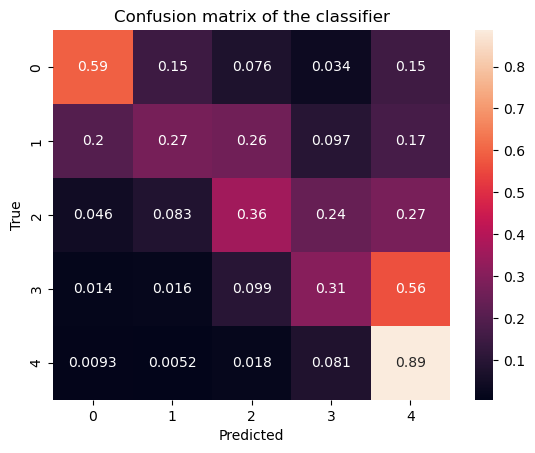

In [19]:
cm_2 = confusion_matrix(Y_val['Score'], gbc_pred, normalize='true')
sns.heatmap(cm_2, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [21]:
Y_text_summary['Text'].fillna('', inplace=True)
Y_text_summary['Summary'].fillna('', inplace=True)

/var/folders/v8/mv4rys5139g9vp7llrmrtr580000gn/T/ipykernel_6015/892453909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_text_summary['Text'].fillna('', inplace=True)
/var/folders/v8/mv4rys5139g9vp7llrmrtr580000gn/T/ipykernel_6015/892453909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_text_summary['Summary'].fillna('', inplace=True)


In [20]:
Y_text_summary = Y[['Text', 'Summary']]

In [22]:
Y_text_vec = text_vectorizer.transform(Y_text_summary['Text'].tolist())
Y_summary_vec = summary_vectorizer.transform(Y_text_summary['Summary'].tolist())
Y_combined_vec = hstack([Y_text_vec, Y_summary_vec])

In [23]:
testingset_probs = nb_model.predict_proba(Y_combined_vec)   
gbc_pred_testset = gbc.predict(testingset_probs)

final_table = np.concatenate((Y['Id'].values.reshape(-1,1), gbc_pred_testset.reshape(-1,1)), axis=1)
final_table.shape

(212192, 2)

In [24]:
final_table_PD = pd.DataFrame(final_table, columns=['Id', 'Score'])

In [27]:
final_table_PD.to_csv('./data/submission-11.csv', index=False)
print("Submission file created")

Submission file created


In [26]:
print(final_table_PD['Id'].nunique())

212192


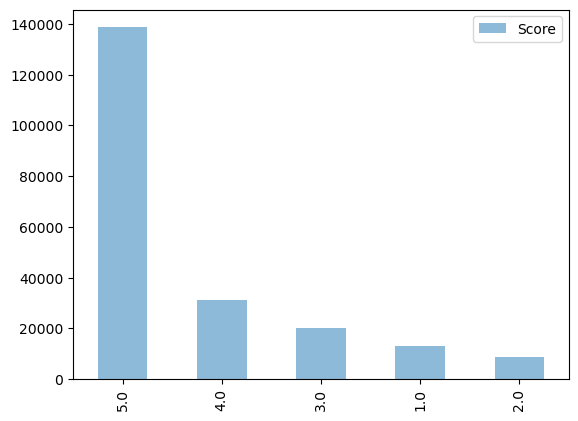

In [25]:
final_table_PD['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show() 